(122, 122)
(122, 122)
读取完成
init_solutions 1 / 100
init_solutions 2 / 100
init_solutions 3 / 100
init_solutions 4 / 100
init_solutions 5 / 100
init_solutions 6 / 100
init_solutions 7 / 100
init_solutions 8 / 100
init_solutions 9 / 100
init_solutions 10 / 100
init_solutions 11 / 100
init_solutions 12 / 100
init_solutions 13 / 100
init_solutions 14 / 100
init_solutions 15 / 100
init_solutions 16 / 100
init_solutions 17 / 100
init_solutions 18 / 100
init_solutions 19 / 100
init_solutions 20 / 100
init_solutions 21 / 100
init_solutions 22 / 100
init_solutions 23 / 100
init_solutions 24 / 100
init_solutions 25 / 100
init_solutions 26 / 100
init_solutions 27 / 100
init_solutions 28 / 100
init_solutions 29 / 100
init_solutions 30 / 100
init_solutions 31 / 100
init_solutions 32 / 100
init_solutions 33 / 100
init_solutions 34 / 100
init_solutions 35 / 100
init_solutions 36 / 100
init_solutions 37 / 100
init_solutions 38 / 100
init_solutions 39 / 100
init_solutions 40 / 100
init_solutions 41 / 10

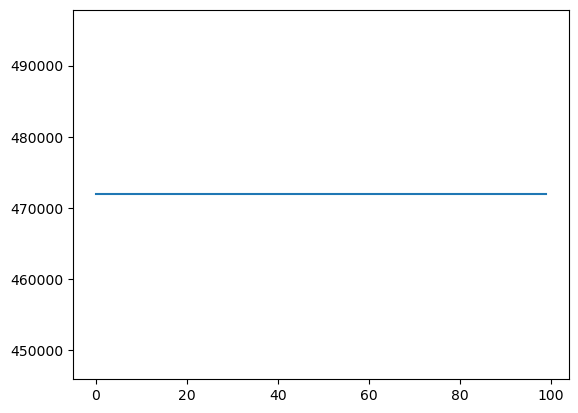

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

# 判断生成的解是否重复

def repeat(solutions, solutions_list):
    solutions_l = np.array(solutions_list)
    b = 0
    for i in range(len(solutions_list)):
        if ((solutions == solutions_l[i]).all()) == True :
            b = 1
    return b

# 判断是否近邻
def neighbor(ch, neighbor_m):
    m, n = ch.shape
    x = ch.copy()
    a = neighbor_m.copy()
    c = np.matmul(x, a)
    cc = np.multiply(c, x)
    k = 0
    for i in range(m):
        for j in range(n):
            if cc[i][j] == 1:
                k = k - 1
    return k

# 判断是否该点为服务中心
def serve_position_juge(q, serve_position):
    result = 0
    for f in serve_position:
        if q == f:
            result = 1
    return result


# 生成初始解
def init_solutions(city, serve_position, neighbor_metric, distance_metric, iterations):
    solutions_list = []
    k = 0
    while k < iterations:
        if k == 0:
            solutions = np.zeros((len(serve_position), city), dtype=int)
            city_sequence = np.arange(city)
            for i in city_sequence:
                distance_i = []
                for j in serve_position:
                    distance_ij = distance_metric[i][j]
                    distance_i.append(distance_ij)
                serve_choice = distance_i.index(min(distance_i))
                solutions[serve_choice][i] = 1
            solutions_list.append(solutions)
            k = k + 1
            if neighbor(solutions, neighbor_metric) == 0:
                print("init_solutions", k, "/", iterations)
        else:
            ch_variation = solutions_list[k-1].copy()
            #flag = 0
            city_list = np.arange(city)
            city_available = np.delete(city_list, serve_position)
            #time = 0
            #while flag != 1 :#or time < 2:
            vary_column = np.random.choice(city_available, size=random.randint(3, 7), replace=False)
            for vc in vary_column:
                vary_row = np.where(ch_variation[:, vc] == 1)[0]
                ch_variation[vary_row[0]][vc] = 0
                vary_position = np.random.choice(np.delete(np.arange(len(ch_variation)), vary_row), size=1)
                ch_variation[vary_position[0]][vc] = 1
            #time = time + 1
            #print(ch_variation)
            if neighbor(ch_variation, neighbor_metric) == 0 and repeat(ch_variation, solutions_list) == 0:
            #flag = 1
                k = k+1
                solutions_list.append(ch_variation)
                print("init_solutions", k, "/", iterations)


        """
        if neighbor(solutions, neighbor_metric) == 0:
            k = k + 1
            solutions_list.append(solutions)
            print("init_solutions", k, "/", iterations)
        """
    return solutions_list[1:iterations]
    """
    while k < iterations:
        a = 0
        solutions = np.zeros((len(serve_position), city), dtype=int)
        for i in range(city):
            if serve_position_juge(i, serve_position) == 1:
                solutions[a][i] = 1
                a = a + 1
            else:
                j = np.random.choice(len(serve_position))
                solutions[j][i] = 1
        if neighbor(solutions, neighbor_metric) == 0 and repeat(solutions, solutions_list) == 0:
            k = k + 1
            solutions_list.append(solutions)
            print("init_solutions", k, "/", iterations)
    return solutions_list
    """


# 计算总成本

def fitness(chrome, distance_metric, serve_position, demand_metric):
    fit = 0
    for i in range(len(chrome)):
        serve_cities = np.where(chrome[i] == 1)[0]
        for j in serve_cities:
            fit = fit + (distance_metric[serve_position[i]][j])*(demand_metric[j][0])
    return fit


# 交叉操作

def cross_action(cross_probability, city, serve_position, solutions_list, distance_metric, neighbor_metric, demand_metric):
    city_list = np.arange(city)
    city_available = np.delete(city_list, serve_position)
    for i in range(len(solutions_list)):
        if random.random() < cross_probability:
            flag1 = 0
            ch1 = solutions_list[i].copy()
            while flag1 != 1:
                cross_chrome = np.random.choice(np.delete(np.arange(len(solutions_list)), i), size=1)
                ch2 = solutions_list[cross_chrome[0]].copy()
                flag = 0
                #times = 0
                while flag != 1:
                    """
                    if times > 0:
                        cross_size = 1
                    else:
                        cross_size = random.randint(3, int(len(city_available) / 2))
                    """
                    cross_column = np.random.choice(city_available, size=random.randint(2, 6), replace=False)
                    for j in cross_column:
                        ch1[:, j] = ch2[:, j]
                    if neighbor(ch1, neighbor_metric) == 0:
                        flag = 1
                    #times = times + 1
                if repeat(ch1, solutions_list) == 0:
                    flag1 = 1
                    if fitness(ch1, distance_metric, serve_position, demand_metric) < fitness(solutions_list[i], distance_metric, serve_position, demand_metric):
                        solutions_list[i] = ch1


    return solutions_list

# 变异
def variation(city, solutions_list, variation_probability, neighbor_metric, distance_metric, serve_position, demand_metric):
    city_list = np.arange(city)
    city_available = np.delete(city_list, serve_position)
    for i in range(len(solutions_list)):
        if random.random() < variation_probability:
            #ch_variation = solutions_list[i].copy()
            flag = 0
            while flag != 1:
                ch_variation = solutions_list[i].copy()
                vary_column = np.random.choice(city_available, size=1, replace=False)
                vary_row = np.where(ch_variation[:, vary_column] == 1)[0]
                ch_variation[vary_row[0]][vary_column[0]] = 0
                vary_position = np.random.choice(np.delete(np.arange(len(ch_variation)), vary_row), size=1)
                ch_variation[vary_position[0]][vary_column[0]] = 1
                if neighbor(ch_variation, neighbor_metric) == 0 and repeat(ch_variation, solutions_list) == 0:
                    flag = 1
                    if fitness(ch_variation, distance_metric, serve_position, demand_metric) < fitness(solutions_list[i], distance_metric,
                                                                               serve_position, demand_metric):
                        solutions_list[i] = ch_variation

    return solutions_list



if __name__ == '__main__':
    # 读取距离矩阵
    distance_data = pd.read_excel("hunandata.xlsx", sheet_name="距离矩阵", header=None)
    #distance_data = pd.read_excel("distancedataess.xlsx", header=None)
    distance_data_list = distance_data.values.tolist()
    distance_metric = np.array(distance_data_list)
    print(distance_metric.shape)
    # 需求点数量
    city = len(distance_metric)
    # 读取近邻矩阵
    data_neighbor = pd.read_excel("hunandata.xlsx", sheet_name="邻接矩阵", header=None)
    #data_neighbor = pd.read_excel("adjacentdata.xlsx", header=None)
    data_neighbor_list = data_neighbor.values.tolist()
    neighbor_metric = np.array(data_neighbor_list)
    print(neighbor_metric.shape)
    """
    sign = 0
    for q in range(len(neighbor_metric)):
        if sum(neighbor_metric[:, q]) < 3:
            sign = q
    print(sign)
    """

    # 读取需求矩阵
    demand_data = pd.read_excel("hunandata.xlsx", sheet_name="demanddata", header=None)
    #demand_data = pd.read_excel("demanddata.xlsx", header=None)
    demand_data_list = demand_data.values.tolist()
    demand_metric = np.array(demand_data_list)
    print("读取完成")
    # 服务中心坐标
    #serve_position = np.array([1, 8, 12, 18])
    #serve_position = np.array([91, 56, 38, 103, 1, 119, 119, 63, 83, 36, 11, 54])
    serve_position = np.array([2, 25, 40, 53, 55, 62, 68, 81, 104, 105])
    # 初始解数量
    iterations = 100
    # 交叉概率
    cross_probability = 0.6
    # 变异概率
    variation_probability = 0.2
    # 回合数
    epochs = 100
    # 生成初始解
    solutions_list = init_solutions(city, serve_position, neighbor_metric, distance_metric, iterations)
    print("生成初始解")
    #print(neighbor(solutions_list[0], neighbor_metric))
    #print(repeat(solutions_list[0], solutions_list[2]))
    g_best = []
    fit_best_list = []
    for i in range(epochs):
        fitness_list = []
        # 找到初始全局最优
        for k in range(len(solutions_list)):
            fit = fitness(solutions_list[k], distance_metric, serve_position, demand_metric)
            fitness_list.append(fit)
        g_best = solutions_list[fitness_list.index(min(fitness_list))]
        fit_best_list.append(min(fitness_list))
        solutions_list = cross_action(cross_probability, city, serve_position, solutions_list, distance_metric, neighbor_metric, demand_metric)
        solutions_list = variation(city, solutions_list, variation_probability, neighbor_metric, distance_metric, serve_position, demand_metric)
        print("epoch", i, min(fitness_list))
    print(fit_best_list)
    print(g_best)
    plt.plot(np.arange(epochs), fit_best_list)
    plt.show()

In [2]:
from pyecharts import options as opts
from pyecharts.charts import Map
from pyecharts.faker import Faker
import os
import pandas as pd
import numpy as np

import json
quxian_data = pd.read_excel("hunandata.xlsx", sheet_name="单元区域", header=None)
quxian_data_list = quxian_data[1].values.tolist()
value = np.zeros(len(quxian_data), dtype=int)
g_best_chrome = g_best.copy()
for position in range(len(quxian_data_list)):
    value[position] = np.where(g_best_chrome[:,position] == 1)[0]
#result = [list(z) for z in zip(quxian_data_list, value)]
#result = [(i, random.randint(1,10)) for i in quxian_data_list]
result1 = list(zip(quxian_data_list, value))
result2 = result1.copy()
print(result1)

[('岳麓区', 0), ('芙蓉区', 0), ('天心区', 0), ('开福区', 0), ('雨花区', 0), ('望城区', 0), ('浏阳市', 0), ('宁乡市', 0), ('长沙县', 0), ('天元区', 0), ('荷塘区', 0), ('芦淞区', 0), ('石峰区', 0), ('渌口区', 0), ('醴陵市', 0), ('攸县', 1), ('茶陵县', 1), ('炎陵县', 1), ('岳塘区', 0), ('雨湖区', 0), ('湘乡市', 0), ('韶山市', 0), ('湘潭县', 0), ('蒸湘区', 1), ('珠晖区', 1), ('雁峰区', 1), ('石鼓区', 1), ('南岳区', 1), ('耒阳市', 1), ('常宁市', 1), ('衡阳县', 1), ('衡南县', 1), ('衡山县', 1), ('衡东县', 1), ('祁东县', 1), ('大祥区', 2), ('双清区', 2), ('北塔区', 2), ('武冈市', 2), ('邵东市', 2), ('新邵县', 2), ('邵阳县', 2), ('隆回县', 2), ('洞口县', 2), ('绥宁县', 2), ('新宁县', 2), ('城步苗族自治县', 2), ('岳阳楼区', 3), ('云溪区', 3), ('君山区', 3), ('汨罗市', 4), ('临湘市', 3), ('岳阳县', 4), ('华容县', 3), ('湘阴县', 4), ('平江县', 4), ('武陵区', 5), ('鼎城区', 5), ('津市市', 5), ('安乡县', 3), ('汉寿县', 5), ('澧县', 5), ('临澧县', 5), ('桃源县', 5), ('石门县', 5), ('永定区', 6), ('武陵源区', 5), ('慈利县', 5), ('桑植县', 6), ('赫山区', 0), ('资阳区', 0), ('沅江市', 3), ('南县', 3), ('桃江县', 0), ('安化县', 5), ('北湖区', 7), ('苏仙区', 7), ('资兴市', 1), ('桂阳县', 7), ('宜章县', 7), ('永兴县', 1), ('嘉禾县', 7), ('临武县', 7), 

In [3]:
#print(result1)

result_final = [('岳麓区', 0), ('芙蓉区', 0), ('天心区', 0), ('开福区', 0), 
            ('雨花区', 0), ('望城区', 0), ('浏阳市', 0), ('宁乡市', 0), 
           ('长沙县', 0), ('天元区', 0), ('荷塘区', 0), ('芦淞区', 0), 
           ('石峰区', 0), ('渌口区', 0), ('醴陵市', 0), ('攸县', 1), 
           ('茶陵县', 1), ('炎陵县', 1), ('岳塘区', 0), ('雨湖区', 0), 
           ('湘乡市', 0), ('韶山市', 0), ('湘潭县', 0), ('蒸湘区', 1), 
           ('珠晖区', 1), ('雁峰区', 1), ('石鼓区', 1), ('南岳区', 1), 
           ('耒阳市', 1), ('常宁市', 1), ('衡阳县', 1), ('衡南县', 1),
           ('衡山县', 1), ('衡东县', 1), ('祁东县', 1), ('大祥区', 2),
           ('双清区', 2), ('北塔区', 2), ('武冈市', 2), ('邵东市', 2),
           ('新邵县', 2), ('邵阳县', 2), ('隆回县', 2), ('洞口县', 2),
           ('绥宁县', 2), ('新宁县', 2), ('城步苗族自治县', 2), ('岳阳楼区', 3),
           ('云溪区', 3), ('君山区', 3), ('汨罗市', 4), ('临湘市', 3), 
           ('岳阳县', 4), ('华容县', 3), ('湘阴县', 4), ('平江县', 4), 
           ('武陵区', 5), ('鼎城区', 5), ('津市市', 5), ('安乡县', 3),
           ('汉寿县', 5), ('澧县', 5), ('临澧县', 5), ('桃源县', 5),
           ('石门县', 5), ('永定区', 6), ('武陵源区', 5), ('慈利县', 5), 
           ('桑植县', 6), ('赫山区', 0), ('资阳区', 0), ('沅江市', 3),
           ('南县', 3), ('桃江县', 0), ('安化县', 5), ('北湖区', 7), 
           ('苏仙区', 7), ('资兴市', 1), ('桂阳县', 7), ('宜章县', 7), 
           ('永兴县', 1), ('嘉禾县', 7), ('临武县', 7), ('汝城县', 7), 
           ('桂东县', 1), ('安仁县', 1), ('冷水滩区', 2), ('零陵区', 1), 
           ('祁阳市', 1), ('东安县', 2), ('双牌县', 7), ('道县', 7), 
           ('江永县', 7), ('宁远县', 7), ('蓝山县', 7), ('新田县', 7), 
           ('江华瑶族自治县', 7), ('鹤城区', 8), ('洪江市', 8), ('中方县', 8),
           ('沅陵县', 8), ('辰溪县', 8), ('溆浦县', 8), ('会同县', 8), 
           ('麻阳苗族自治县', 8), ('新晃侗族自治县', 9), ('芷江侗族自治县', 9), 
           ('靖州苗族侗族自治县', 8), ('通道侗族自治县', 8), ('娄星区', 2), 
           ('冷水江市', 2), ('涟源市', 2), ('双峰县', 1), ('新化县', 2), 
           ('吉首市', 8), ('泸溪县', 8), ('凤凰县', 8), ('花垣县', 8), 
           ('保靖县', 6), ('古丈县', 6), ('永顺县', 6), ('龙山县', 6)]

'''
result_final = [('岳麓区', 0), ('芙蓉区', 0), ('天心区', 0), ('开福区', 0),
                ('雨花区', 0), ('望城区', 0), ('浏阳市', 0), ('宁乡市', 0), 
                ('长沙县', 0), ('天元区', 0), ('荷塘区', 0), ('芦淞区', 0), 
                ('石峰区', 0), ('渌口区', 0), ('醴陵市', 0), ('攸县', 1), 
                ('茶陵县', 1), ('炎陵县', 1), ('岳塘区', 0), ('雨湖区', 0), 
                ('湘乡市', 0), ('韶山市', 0), ('湘潭县', 0), ('蒸湘区', 1), 
                ('珠晖区', 1), ('雁峰区', 1), ('石鼓区', 1), ('南岳区', 1), 
                ('耒阳市', 1), ('常宁市', 1), ('衡阳县', 1), ('衡南县', 1), 
                ('衡山县', 1), ('衡东县', 1), ('祁东县', 1), ('大祥区', 2), 
                ('双清区', 2), ('北塔区', 2), ('武冈市', 2), ('邵东市', 2), 
                ('新邵县', 2), ('邵阳县', 2), ('隆回县', 2), ('洞口县', 2), 
                ('绥宁县', 2), ('新宁县', 2), ('城步苗族自治县', 2), ('岳阳楼区', 3), 
                ('云溪区', 3), ('君山区', 3), ('汨罗市', 4), ('临湘市', 3), 
                ('岳阳县', 4), ('华容县', 3), ('湘阴县', 4), ('平江县', 4), 
                ('武陵区', 5), ('鼎城区', 5), ('津市市', 5), ('安乡县', 3),
                ('汉寿县', 5), ('澧县', 5), ('临澧县', 5), ('桃源县', 5), 
                ('石门县', 5), ('永定区', 6), ('武陵源区', 5), ('慈利县', 5),
                ('桑植县', 6), ('赫山区', 0), ('资阳区', 0), ('沅江市', 3), 
                ('南县', 3), ('桃江县', 0), ('安化县', 5), ('北湖区', 7), 
                ('苏仙区', 7), ('资兴市', 1), ('桂阳县', 7), ('宜章县', 7), 
                ('永兴县', 1), ('嘉禾县', 7), ('临武县', 7), ('汝城县', 7), 
                ('桂东县', 1), ('安仁县', 1), ('冷水滩区', 2), ('零陵区', 1), 
                ('祁阳市', 1), ('东安县', 2), ('双牌县', 7), ('道县', 7), 
                ('江永县', 7), ('宁远县', 7), ('蓝山县', 7), ('新田县', 7), 
                ('江华瑶族自治县', 7), ('鹤城区', 8), ('洪江市', 8), ('中方县', 8), 
                ('沅陵县', 8), ('辰溪县', 8), ('溆浦县', 8), ('会同县', 8), 
                ('麻阳苗族自治县', 8), ('新晃侗族自治县', 9), ('芷江侗族自治县', 9),
                ('靖州苗族侗族自治县', 8), ('通道侗族自治县', 8), ('娄星区', 2), 
                ('冷水江市', 2), ('涟源市', 2), ('双峰县', 1), ('新化县', 2), 
                ('吉首市', 8), ('泸溪县', 8), ('凤凰县', 8), ('花垣县', 8), 
                ('保靖县', 6), ('古丈县', 6), ('永顺县', 6), ('龙山县', 6)]
'''
with open('湖南省县区.geojson','r',encoding='utf-8') as f:
    j = json.load(f)
c = (
    Map()
    .add_js_funcs("echarts.registerMap('湖南省县区', {});".format(j))
    .add("湖南省县区",result_final, "湖南省县区", is_map_symbol_show=False, 
         label_opts=opts.LabelOpts(is_show=True))
    .set_global_opts(
        title_opts=opts.TitleOpts(title="湖南省县区"), 
        visualmap_opts=opts.VisualMapOpts(is_piecewise=False, max_=10,min_=0
                                          )
    )
    .render("hunan1.html")
)

os.system("hunan1.html")

0